In [1]:
import numpy as np
import getdist
from getdist import MCSamples, plots
import pysm3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nlmax = 256
ells = np.arange(2,nlmax+1)
coeff = ells*(ells+1)/(2*np.pi)
theory_cl_l = pd.read_csv('../../../cmb_new_ps_l.txt', sep = '\t', header = None, index_col = 0) 

In [4]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1.5

## Variation with $\ell_0$

In [6]:
a1l64 = np.load('../results/aps_a1l64_white.npy')
a1l128 = np.load('../results/aps_a1l128_white.npy')
a1l256 = np.load('../results/aps_a1l256_white.npy')
a1lv = np.load('../results/aps_a1lv_white.npy')

/tmp/ipykernel_2742/1994867950.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.loglog(ells, theory_cl_l[3][:nlmax], label = 'Theory', color = 'k', linestyle = '--', linewidth = 2.5)


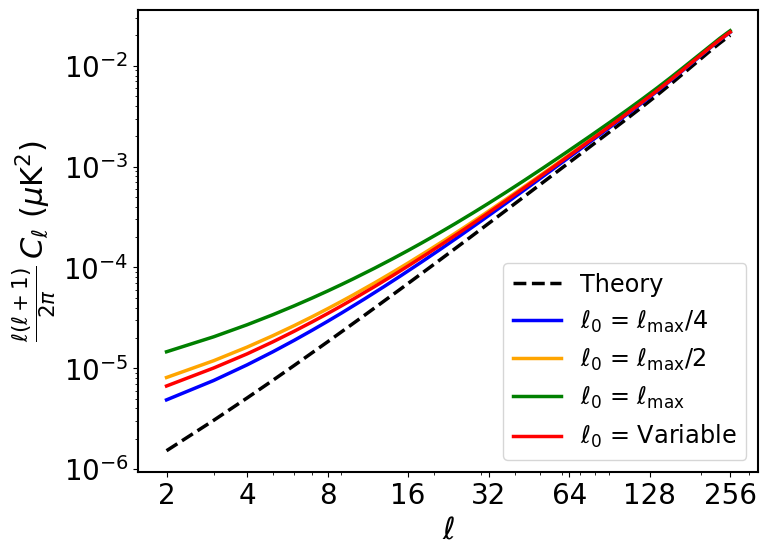

In [7]:
plt.figure(figsize = (8,6))
plt.loglog(ells, theory_cl_l[3][:nlmax], label = 'Theory', color = 'k', linestyle = '--', linewidth = 2.5)
plt.plot(ells, coeff*a1l64[0, 2:], label = r'$\ell_0$ = $\ell_\max$/4', color = 'b', linewidth = 2.5)
plt.plot(ells, coeff*a1l128[0, 2:], label = r'$\ell_0$ = $\ell_\max$/2', color = 'orange', linewidth = 2.5)
plt.plot(ells, coeff*a1l256[0, 2:], label = r'$\ell_0$ = $\ell_\max$', color = 'g', linewidth = 2.5)
plt.plot(ells, coeff*a1lv[0, 2:], label = r'$\ell_0$ = Variable', color = 'r', linewidth = 2.5)

plt.legend(fontsize = 'xx-large', loc = 'lower right')
plt.xlabel(r'$\ell $', fontsize = 22)
plt.ylabel(r'$ \frac{\ell (\ell+1)}{2 \pi}\, C_\ell \,\, (\mu \mathrm{K}^2)$', fontsize = 22)
# plt.title(r'BB APS - variation with $\ell_0$', fontsize = 15)
plt.tick_params(axis = 'both', labelsize = 20)

xticks = [2, 4, 8, 16, 32, 64, 128, 256]
plt.xticks(xticks, xticks)
plt.savefig('plots_white/aps_ell0_white.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Variation with $\alpha$

In [8]:
a0l128 = np.load('../results/aps_a0l128_white.npy')
a1l128 = np.load('../results/aps_a1l128_white.npy')
a2l128 = np.load('../results/aps_a2l128_white.npy')
avl128 = np.load('../results/aps_avl128_white.npy')

/tmp/ipykernel_2742/273835469.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.loglog(ells, theory_cl_l[3][:nlmax], label = 'Theory', color = 'k', linestyle = '--', linewidth = 2.5)


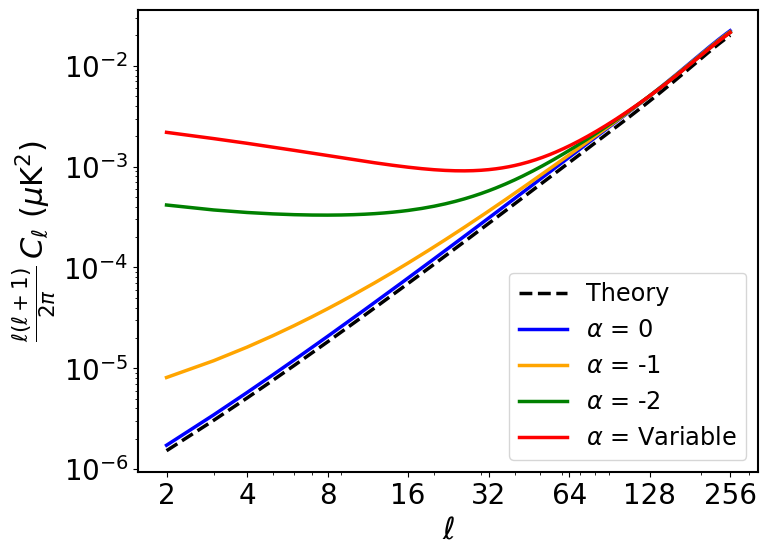

In [9]:
plt.figure(figsize = (8,6))
plt.loglog(ells, theory_cl_l[3][:nlmax], label = 'Theory', color = 'k', linestyle = '--', linewidth = 2.5)
plt.plot(ells, coeff*a0l128[0, 2:], label = r'$\alpha$ = 0', color = 'b', linewidth = 2.5)
plt.plot(ells, coeff*a1l128[0, 2:], label = r'$\alpha$ = -1', color = 'orange', linewidth = 2.5)
plt.plot(ells, coeff*a2l128[0, 2:], label = r'$\alpha$ = -2', color = 'g', linewidth = 2.5)
plt.plot(ells, coeff*avl128[0, 2:], label = r'$\alpha$ = Variable', color = 'r', linewidth = 2.5)

plt.legend(fontsize = 'xx-large', loc = 'lower right')
plt.xlabel(r'$\ell $', fontsize = 22)
plt.ylabel(r'$ \frac{\ell (\ell+1)}{2 \pi}\, C_\ell \, \, (\mu \mathrm{K}^2)$', fontsize = 22)
# plt.title(r'BB APS - variation with $\alpha$', fontsize = 15)
plt.tick_params(axis = 'both', labelsize = 20)

xticks = [2, 4, 8, 16, 32, 64, 128, 256]
plt.xticks(xticks, xticks)
plt.savefig('plots_white/aps_alpha_white.png', dpi = 300, bbox_inches = 'tight')

plt.show()

## General model

In [11]:
avlv = np.load('../results/aps_avlv_white.npy')
bavlv = np.load('../results/aps_bavlv_white.npy')

In [12]:
import pysm3.units as u
import healpy as hp
target_resol = 39.9*u.arcmin
target_beam = hp.gauss_beam(np.radians(target_resol.value/60), lmax= 3*128 - 1, pol=True)
target_beam_T = target_beam[:,0]
target_beam_p = target_beam[:,1]

/tmp/ipykernel_2742/1525140922.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.loglog(ells, theory_cl_l[3][:nlmax], label = 'Theory', color = 'k', linestyle = '--', linewidth = 2.5)


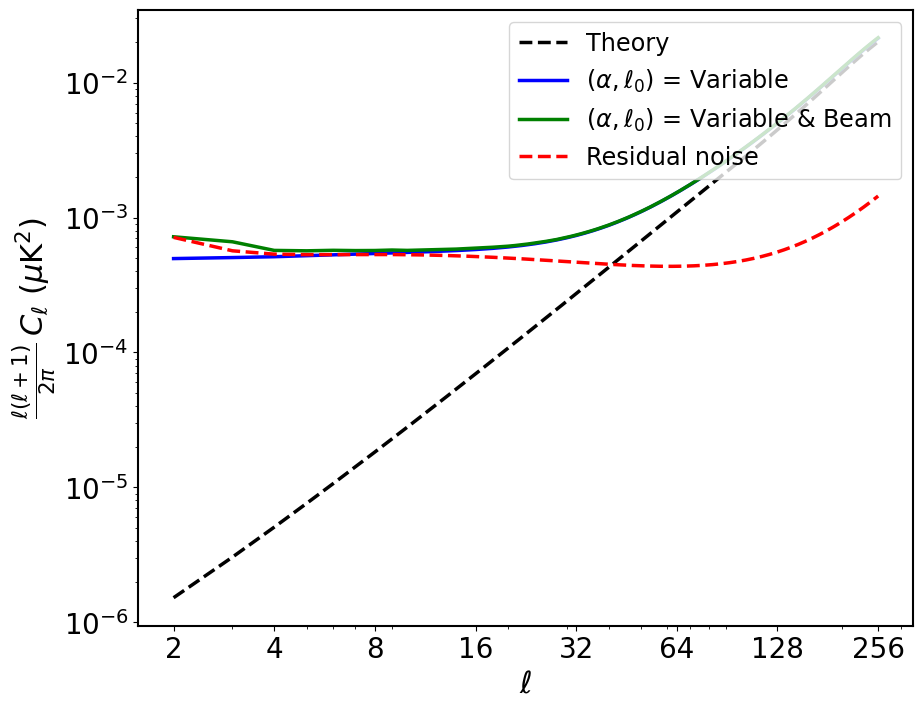

In [13]:
plt.figure(figsize = (10,8))
plt.loglog(ells, theory_cl_l[3][:nlmax], label = 'Theory', color = 'k', linestyle = '--', linewidth = 2.5)
plt.plot(ells, coeff*avlv[0, 2:], label = r'$(\alpha, \ell_0)$ = Variable', color = 'b', linewidth = 2.5)
plt.plot(ells, coeff*bavlv[0, 2:], label = r'$(\alpha, \ell_0)$ = Variable & Beam', color = 'g', linewidth = 2.5)
plt.plot(ells, coeff*bavlv[1, 2:], linestyle = '--', label = 'Residual noise', color = 'r', linewidth = 2.5)
# plt.plot(ells, coeff*(bavlv[0, 2:] - bavlv[1, 2:]), linestyle = ':', label = 'signal -  noise', color = 'b', linewidth = 2.5)
# plt.plot(ells, 1/target_beam_p[ells]**2, label = r'$1\, / \, B_\ell^2$', linewidth = 2.5, color = 'y', linestyle = '-.')

# plt.plot(ells, np.abs(coeff*(bavlv[0, 2:] - avlv[0, 2:])), label = r'beam - no beam', color = 'c', linewidth = 2.5)

plt.legend(fontsize = 'xx-large', loc = 'upper right')
plt.xlabel(r'$\ell $', fontsize = 22)
plt.ylabel(r'$ \frac{\ell (\ell+1)}{2 \pi}\, C_\ell \, \, (\mu \mathrm{K}^2)$', fontsize = 22)
# plt.title(r'BB APS - variation with $\alpha$', fontsize = 15)
plt.tick_params(axis = 'both', labelsize = 20)

xticks = [2, 4, 8, 16, 32, 64, 128, 256]
plt.xticks(xticks, xticks)

# plt.xlim(4)
plt.savefig('plots_white/aps_bavlv_white.png', bbox_inches = 'tight')

plt.show()

## Residuals foreground

In [14]:
res_fg_a1l64 = np.load('stat_fg/res_a1l64_white.npy')
res_fg_a1l128 = np.load('stat_fg/res_a1l128_white.npy')
res_fg_a1l256 = np.load('stat_fg/res_a1l256_white.npy')
res_fg_a1lv = np.load('stat_fg/res_a1lv_white.npy')

res_fg_avlv = np.load('stat_fg/res_avlv_white.npy')
res_fg_bavlv = np.load('stat_fg/res_bavlv_white.npy')

res_fg_a0l128 = np.load('stat_fg/res_a0l128_white.npy')
res_fg_a1l128 = np.load('stat_fg/res_a1l128_white.npy')
res_fg_a2l128 = np.load('stat_fg/res_a2l128_white.npy')
res_fg_avl128 = np.load('stat_fg/res_avl128_white.npy')

## Estimating r

In [15]:
import camb

In [16]:
pars = camb.set_params(ombh2=0.022, omch2=0.12, tau=0.054,  
                       As=2e-9, ns=0.965, cosmomc_theta = 1.04e-2,
                       r = 1, DoLensing = True, WantTensors = True,
                       Want_CMB_lensing = True, lmax = 1024)

In [17]:
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax = 1024)  #returns only the Cls

cl_bb_r1 = powers['tensor'][:,2]

In [18]:
cl_lens = (pd.read_csv('../../../cmb_new_ps_l.txt', sep = '\t', header = None, index_col = 0))
cl_bb = np.array(cl_lens[3])

cl_bb_lens = np.zeros(1025)
cl_bb_lens[2:] = cl_bb[:1023]

In [19]:
ell = np.arange(2, nlmax + 1)
fsky = 0.5

coeff = ell * (ell + 1)/(2*np.pi)

cl_bb_lens = cl_bb_lens[ell]/coeff
cl_bb_r1 = cl_bb_r1[ell]/coeff

r_ = np.linspace(-1e-2, 1e-2, 100000)

In [20]:
def log_likelihood(r, ell, fsky, Cl_BB, clbb_r1, clbb_lens, noise, res_fg):
    model = clbb_r1 * r + clbb_lens + noise + res_fg
    r_hm1_ll =  -1 * np.sum((2 * ell + 1) * fsky * (Cl_BB / model + np.log(model)))
    if r_hm1_ll != r_hm1_ll:
        return -np.inf
    return r_hm1_ll
def log_prior(r):
    if -0.5 <= r <= 1:
        return 0.0
    return -np.inf

def log_posterior(r, ell, fsky, Cl_BB, clbb_r1, clbb_lens, noise, res_fg):
    lp = log_prior(r)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(r, ell, fsky, Cl_BB, clbb_r1, clbb_lens, noise, res_fg)

In [21]:
def get_r_and_sigmas(cls_sig, noise_res, cls_res_fg):
    N = 1
    # N = 1e6
    logpost = np.array([log_posterior(r, ell, fsky, cls_sig[ell] + cls_res_fg*N, cl_bb_r1, cl_bb_lens, noise_res[ell], cls_res_fg*N) for r in r_])
    L = np.exp(logpost - np.max(logpost))
    r0 = r_[np.argmax(logpost)]
    
    rs_pos = r_[r_ >= r0]
    plike_pos = L[r_ >= r0]
    cum = np.cumsum(plike_pos)
    cum /= cum[-1]
    sigma_r = rs_pos[np.argmin(np.abs(cum -  0.68))] - r0
    
    rs_neg = r_[r_ <= r0]
    plike_neg = L[r_ <= r0]
    cum_neg = np.cumsum(plike_neg[::-1])
    cum_neg /= cum_neg[-1]
    sigma_r_neg = r0 - rs_neg[::-1][np.argmin(np.abs(cum_neg -  0.68))]

    sigma_r_95 = rs_pos[np.argmin(np.abs(cum -  0.95))]
    sigma_r_95

    return r0, sigma_r, sigma_r_neg, L, sigma_r_95

In [22]:
r0_a0l128, sigma_r_a0l128, sigma_r_neg_a0l128, L_a0l128, sigma_r_95_a0l128 = get_r_and_sigmas(a0l128[0], a0l128[1], res_fg_a0l128)
r0_a1l128, sigma_r_a1l128, sigma_r_neg_a1l128, L_a1l128, sigma_r_95_a1l128 = get_r_and_sigmas(a1l128[0], a1l128[1], res_fg_a1l128)
r0_a2l128, sigma_r_a2l128, sigma_r_neg_a2l128, L_a2l128, sigma_r_95_a2l128 = get_r_and_sigmas(a2l128[0], a2l128[1], res_fg_a2l128)
r0_avl128, sigma_r_avl128, sigma_r_neg_avl128, L_avl128, sigma_r_95_avl128 = get_r_and_sigmas(avl128[0], avl128[1], res_fg_avl128)

r0_a1l64, sigma_r_a1l64, sigma_r_neg_a1l64, L_a1l64, sigma_r_95_a1l64 = get_r_and_sigmas(a1l64[0], a1l64[1], res_fg_a1l64)
r0_a1l256, sigma_r_a1l256, sigma_r_neg_a1l256, L_a1l256, sigma_r_95_a1l256 = get_r_and_sigmas(a1l256[0], a1l256[1], res_fg_a1l256)
r0_a1lv, sigma_r_a1lv, sigma_r_neg_a1lv, L_a1lv, sigma_r_95_a1lv = get_r_and_sigmas(a1lv[0], a1lv[1], res_fg_a1lv)

r0_bavlv, sigma_r_bavlv, sigma_r_neg_bavlv, L_bavlv, sigma_r_95_bavlv = get_r_and_sigmas(bavlv[0], bavlv[1], res_fg_bavlv)
r0_avlv, sigma_r_avlv, sigma_r_neg_avlv, L_avlv, sigma_r_95_avlv = get_r_and_sigmas(avlv[0], avlv[1], res_fg_avlv)


/tmp/ipykernel_2742/2834882554.py:3: RuntimeWarning: invalid value encountered in log
  r_hm1_ll =  -1 * np.sum((2 * ell + 1) * fsky * (Cl_BB / model + np.log(model)))


In [23]:
r_estimates = [r0_a0l128, r0_a1l128, r0_a2l128, r0_a1l64, r0_a1l256, r0_a1lv, r0_avl128, r0_bavlv, r0_avlv] 
sigma_pos = [sigma_r_a0l128, sigma_r_a1l128, sigma_r_a2l128, sigma_r_a1l64, sigma_r_a1l256, sigma_r_a1lv, sigma_r_avl128, sigma_r_bavlv, sigma_r_avlv] 
sigma_neg = [sigma_r_neg_a0l128, sigma_r_neg_a1l128, sigma_r_neg_a2l128, sigma_r_neg_a1l64, sigma_r_neg_a1l256, sigma_r_neg_a1lv, sigma_r_neg_avl128, sigma_r_neg_bavlv, sigma_r_neg_avlv] 
L = [L_a0l128, L_a1l128, L_a2l128, L_a1l64, L_a1l256, L_a1lv, L_avl128, L_bavlv, L_avlv] 
sigma_95 = [sigma_r_95_a0l128, sigma_r_95_a1l128, sigma_r_95_a2l128, sigma_r_95_a1l64, sigma_r_95_a1l256, sigma_r_95_a1lv, sigma_r_95_avl128, sigma_r_95_bavlv, sigma_r_95_avlv] 


In [24]:
labels = [r'$\alpha$ = 0, $\ell_0$ = 128', r'$\alpha$ = -1, $\ell_0$ = 128', r'$\alpha$ = -2, $\ell_0$ = 128',
          r'$\alpha$ = -1, $\ell_0$ = 64', r'$\alpha$ = -1, $\ell_0$ = 256', r'$\alpha$ = -1, $\ell_0$ = v',
          r'$\alpha$ = v, $\ell_0$ = 128', r'$\alpha$ = v, $\ell_0$ = v, Beam', r'$\alpha$ = v, $\ell_0$ = v']
for i in range(len(labels)):
    print(labels[i], '\t r95 = ', np.round(sigma_95[i], 6))

$\alpha$ = 0, $\ell_0$ = 128 	 r95 =  0.000137
$\alpha$ = -1, $\ell_0$ = 128 	 r95 =  0.000327
$\alpha$ = -2, $\ell_0$ = 128 	 r95 =  0.000649
$\alpha$ = -1, $\ell_0$ = 64 	 r95 =  0.000247
$\alpha$ = -1, $\ell_0$ = 256 	 r95 =  0.000445
$\alpha$ = -1, $\ell_0$ = v 	 r95 =  0.000301
$\alpha$ = v, $\ell_0$ = 128 	 r95 =  0.000747
$\alpha$ = v, $\ell_0$ = v, Beam 	 r95 =  0.000732
$\alpha$ = v, $\ell_0$ = v 	 r95 =  0.000702
